<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/Crop_Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # SAR Application: Crop Area
## I. How to create SAR quicklook images of agriculture?
* Useful products: 
  * Annual Crops: HH, HV, VV, VH power (backscatter) for different dates, entropy for quad-pol data
  * Perennial Crops: Dual pol: HH, HV, (HH/HV); quad-pol: H-alpha-entropy decomposition
* Wavelengths: L & C 
  * "L and C-band SAR wavelengths are most effective for agricultural applications, as they are sensitive to fine-scale structure characteristics of different crop types and growth stages, while also detecting changes in soil moisture and other soil characteristics." (Whelen, Siqueira 2017).
* Relevant Sensors: UAVSAR, ALOS, Sentinel-1
* How does the user know the SAR data contains and is sensitive to crop area: Vegetation structure, Volume Index, Earliest Identifiable Timing (EIT)

## II. How to interpret SAR images of agriculture?
SAR is useful for agricultural applications, as it provides data about the vegetation structure and sensitivity to soil roughness and moisture content. See specific products and interpretations suggestions for different agriculture application types.

##### 1. Crop Type Classification (annual crops)
* Leverage polarization ratios such as volume index and temporal trends like Earliest Identifiable Timing (EIT)	
* For interpretation, temporal RGB helps distinguish crop types. Focusing on a given crop, temporal increase in volume ratio reveals timing of crop planting and crop productivity.
  * For example, focus on a single crop and display volume index in winter vs. summer.
  * Use two RGBs: one for co-pol and one for cross-pol. Each RGB shows backscatter for 3 dates (e.g. red = winter, green = peak season, blue = midseason). 

##### 2. Crop Type Classification (perennial crops)
* Volume and entropy can dictate crop type. For example with oil palm and tree plantations, volume would decrease in areas with palms vs trees due to smaller canopy and large relative influence of cylindrial trunks. Entropy decreases in areas with monocrops since trees are planted in rows.

## SAR Example: San Joaquin Valley Agriculture

UAVSAR is an L-Band airborne radar and this example explores monthly UAVSAR data over agricultural fields in California's San Joaquin Valley from 2010. The content of this notebook is as follows:
1. [Running the Notebook](#s1)
2. [HV Backscatter: San Joaquin Valley Agricultural Fields](#s2)

<a name="s1"></a>
## 1. Running the Notebook

- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font> 

### Install Python Packages
This routine uses the following python libaries. Some are already included in the Google Colab environment and others are installed with pip by running the cell below. Downloading new python packages to this environment may take a few minutes to complete.

<font color='red'> 1. Run cell below </font> 

In [ ]:
# Installing packages, may take a few minutes to run
!pip install rasterio --quiet
!pip install geopandas --quiet

import rasterio as rio                     # Read and write geospatial raster data
from rasterio.plot import plotting_extent  # Returns plotting extent in format needed
import matplotlib.pyplot as plt            # Plotting, making graphs
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import numpy as np                         # Numeric and mathematic functions
import math                                # Access to mathematical functions
import geopandas as gpd                    # Visualizing and importing geodata frames

     |████████████████████████████████| 20.9 MB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
     |████████████████████████████████| 7.8 MB 26.6 MB/s 
     |████████████████████████████████| 16.6 MB 80 kB/s 


### Download the Data

Fetch UAVSAR geotiffs from the download links below with wget. These are curated geotifs, subset to our area of interest and are hosted on the UAVSAR website. 

<font color='red'> 2. Run cell below </font> 

In [ ]:
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100114_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100303_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100409_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100510_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100617_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100712_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_100810_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_101025_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/SDelta_23520_101130_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/corn_2010.geojson --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/winterwheat_2010.geojson --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Crop_Type/alfalfa_2010.geojson --quiet

# Read in files
def read_file(path):
  with rio.open(path) as ds:
    band = ds.read(1)
    return band

<a name="s2"></a>
## 2. HV Backscatter: San Joaquin Valley Agricultural Fields

Read in UAVSAR HV geotiffs from 2010 cropped to agricultural fields in California 

Also read in the 2010 USDA Cropland Data Layer (Source: https://www.nass.usda.gov/Research_and_Science/Cropland/Release/).
In the USDA 2010 Cropland Layer, Alfalfa is code 36, Corn is code 1, and Winter Wheat is code 24. 


In [ ]:
Jan2010 = read_file('SDelta_23520_100114_HV.tif')
March2010 = read_file('SDelta_23520_100303_HV.tif')
April2010 = read_file('SDelta_23520_100409_HV.tif')
May2010 = read_file('SDelta_23520_100510_HV.tif')
June2010 = read_file('SDelta_23520_100617_HV.tif')
July2010 = read_file('SDelta_23520_100712_HV.tif')
August2010 = read_file('SDelta_23520_100810_HV.tif')
October2010 = read_file('SDelta_23520_101025_HV.tif')
November2010 = read_file('SDelta_23520_101130_HV.tif')

with rio.open('SDelta_23520_100114_HV.tif') as subset_src:
    subset_extent = plotting_extent(subset_src)
top_left_lon = -121.51980413999999
top_left_lat = 37.94000718
extent_mat = (top_left_lon, top_left_lon + subset_src.shape[1] * 0.00005556000000000000337, top_left_lat - subset_src.shape[0] * 0.00005556000000000000337, top_left_lat)

corn_boundary = gpd.read_file('corn_2010.geojson')
alfalfa_boundary = gpd.read_file('alfalfa_2010.geojson')
winterwheat_boundary = gpd.read_file('winterwheat_2010.geojson')

corn_boundary = corn_boundary.to_crs(subset_src.crs)
alfalfa_boundary = alfalfa_boundary.to_crs(subset_src.crs)
winterwheat_boundary = winterwheat_boundary.to_crs(subset_src.crs)

Convert to dB

In [ ]:
# Convert to decibels
def convert_db_v1(data):
  db = 10*(math.log10(data))
  return db
convert_db = np.vectorize(convert_db_v1)

Jan2010 = convert_db(Jan2010)
March2010 = convert_db(March2010)
April2010 = convert_db(April2010)
May2010 = convert_db(May2010)
June2010 = convert_db(June2010)
July2010 = convert_db(July2010)
August2010 = convert_db(August2010)
October2010 = convert_db(October2010)
November2010 = convert_db(November2010)

### Plot

Overlay USDA cropland layer unto UAVSAR acquistions.

Text(0.5, 1.0, 'Jan 2010')

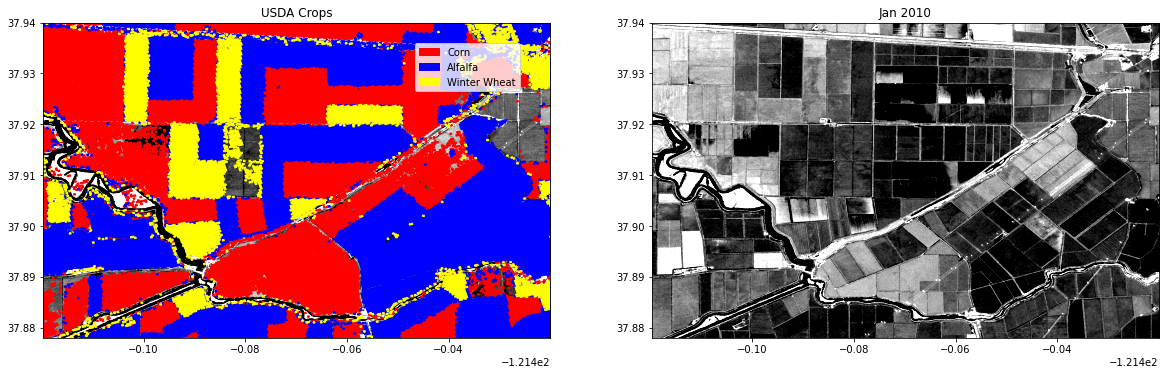

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
corn_boundary.plot(edgecolor='red', facecolor='red', ax=ax1)
alfalfa_boundary.plot(edgecolor='blue', facecolor='blue', ax=ax1)
winterwheat_boundary.plot(edgecolor='yellow', facecolor='yellow', ax=ax1)
overlay = ax1.imshow(Jan2010, vmin=-35, vmax=-20, cmap="gray", extent=extent_mat)
ax1.set_title('USDA Crops')
ax1.legend()
# Add a legend for labels
legend_labels = {"red": "Corn", 
                 "blue": "Alfalfa", 
                 "yellow": "Winter Wheat"}
patches = [Patch(color=color, label=label)
           for color, label in legend_labels.items()]
ax1.legend(handles=patches,
          bbox_to_anchor=(0.95, 0.95),
          facecolor="white")

overlay = ax2.imshow(Jan2010, vmin=-35, vmax=-20, cmap="gray", extent=extent_mat)
ax2.set_title('Jan 2010')

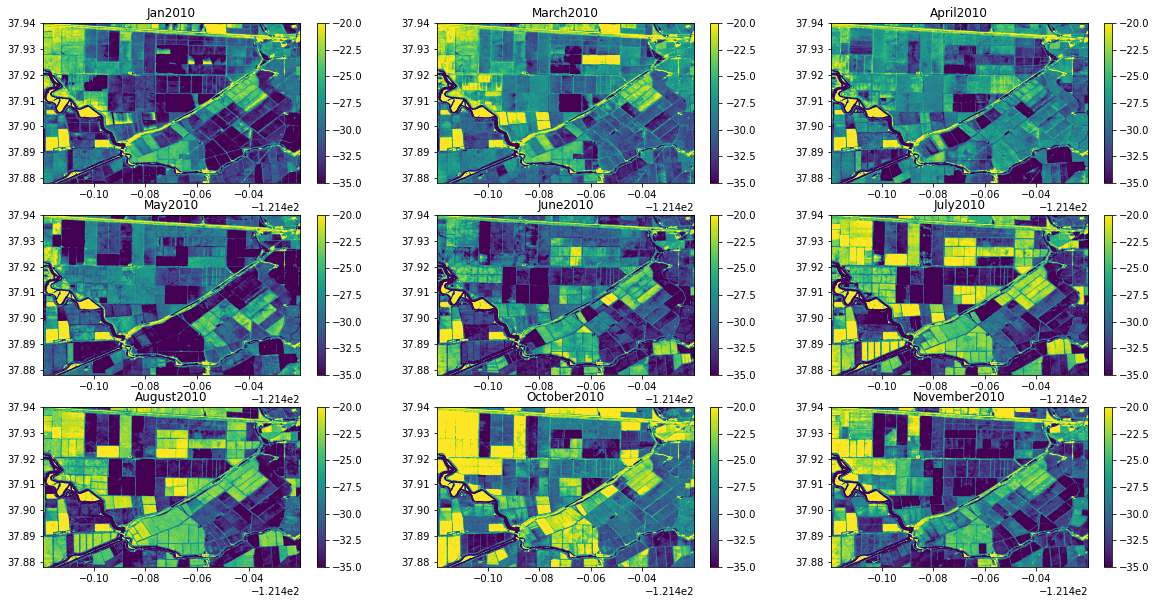

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 10))

Jan2010 = ax1.imshow(Jan2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax1.set_title('Jan2010')
fig.colorbar(Jan2010, ax=ax1)

March2010 = ax2.imshow(March2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax2.set_title('March2010')
fig.colorbar(March2010, ax=ax2)

April2010 = ax3.imshow(April2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax3.set_title('April2010')
fig.colorbar(April2010, ax=ax3)

May2010 = ax4.imshow(May2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax4.set_title('May2010')
fig.colorbar(May2010, ax=ax4)

June2010 = ax5.imshow(June2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax5.set_title('June2010')
fig.colorbar(June2010, ax=ax5)

July2010 = ax6.imshow(July2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax6.set_title('July2010')
fig.colorbar(July2010, ax=ax6)

August2010 = ax7.imshow(August2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax7.set_title('August2010')
fig.colorbar(August2010, ax=ax7)

October2010 = ax8.imshow(October2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax8.set_title('October2010')
fig.colorbar(October2010, ax=ax8)

November2010 = ax9.imshow(November2010, vmin=-35, vmax=-20, cmap="viridis", extent=extent_mat)
ax9.set_title('November2010')
fig.colorbar(November2010, ax=ax9)

In [ ]:
# Time Series per USDA cropland layer type
# Classification 

### Published Example

The figure below is from Whelen and Siqueira's 2017 paper and is centered on the same extent as the Pauli RGB slideshow.

Whelen and Siqueira's 2017 paper "Use of time-series L-band UAVSAR data for the classification of agricultural fields in the San Joaquin Valley" used a UAVSAR time series from 2010-2012 over agricultural fields in the Central Valley to classify different crops. The UAVSAR line was SDelta_23520 over Stockon, California.

To classify the crops, HV power and entropy HV backscatter can each be compared at different dates. These comparisons assist with differentiating crop types for classification, since annual crops may differ in timing of planting and growth. For example, Whelen and Siqueira used UAVSAR backscatter to capture these temporal trends, and their time series were able to distinguish alfafa, winter wheat, and corn crops.

From paper: "Distinguishable signatures were observed for all three crops. The signature was dominated by the growth stage and physical structure of the crops during the mature part of thegrowing season, and by weather events, planting practices, and harvesting procedures during other parts of the year." 

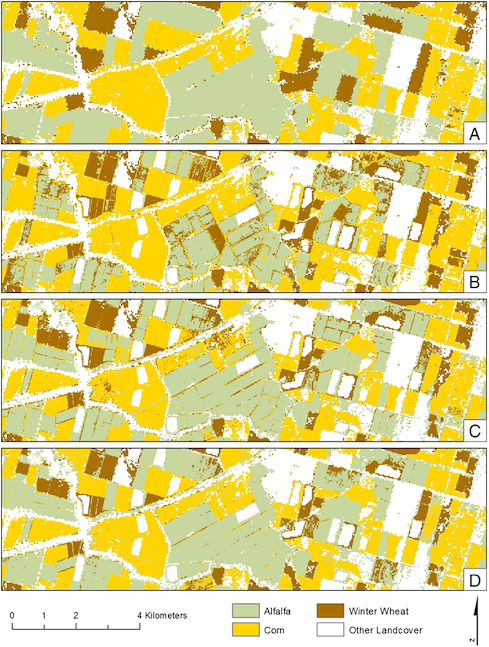


Figure 6. Classification results using the time series error metric given by Eq. (1) for the 2010 Cropland Data Layer (A: CDL) and (B) the 2010 HV-polarized backscatter, (C) the 2010 alpha
classification, and (D) the 2010 entropy classification. The field regions missing from the classifications are areas of training pixels. Similar results and accuracies have been noted when
using the 2010 time series-derived classifier on UAVSAR data collected in 2012.  

### HV Backscatter Time Series
HV backscatter for different dates compared to Whelen and Siqueira Figure 3. 


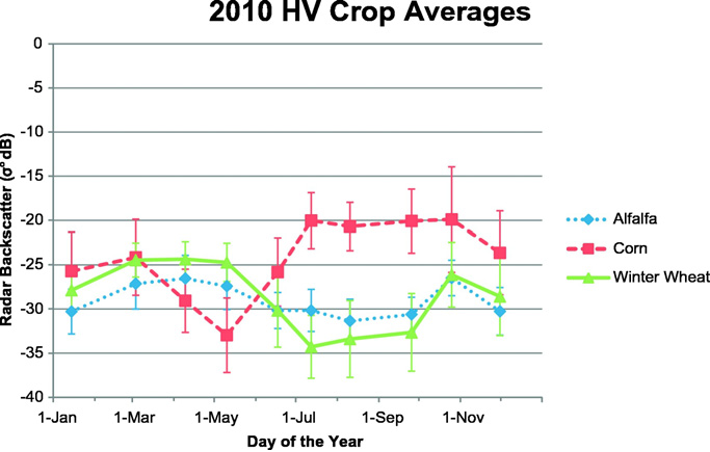

Figure 3: HV-polarized crop averages for the 2010 growing year. Each point on a line shows
the mean of the field averages from one image for that crop-year-polarization
combination. Error bars show one standard deviation for that population of twenty-five
field means determined on the day of observation.

## Other Resources

* UAVSAR data download page: https://uavsar.jpl.nasa.gov/cgi-bin/data.pl
* UAVSAR website: https://uavsar.jpl.nasa.gov 


UAVSAR Original Product Pages:

January 14, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10007_002_100114_L090_CX_01#data

March 3, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10025_005_100303_L090_CX_01#data

April 09, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10026_002_100409_L090_CX_01#data

May 10, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10036_002_100510_L090_CX_01#data

June 17, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10051_002_100617_L090_CX_01#data

July 12, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10059_008_100712_L090_CX_01#data

August 10, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10068_002_100810_L090_CX_01#data

October 25, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10075_003_101025_L090_CX_01#data

November 30, 2010: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SDelta_23520_10083_002_101130_L090_CX_01#data

## References
Whelen, T. Siqueira, P. (2017). Use of time-series L-band UAVSAR data for the classification of agricultural fields in the San Joaquin Valley. Remote Sensing of Environment 193, 216-224. DOI: 10.1016/j.rse.2017.03.014 (https://www.researchgate.net/publication/315725679_Use_of_time-series_L-band_UAVSAR_data_for_the_classification_of_agricultural_fields_in_the_San_Joaquin_Valley)

USDA Cropland Layer: https://www.nass.usda.gov/Research_and_Science/Cropland/Release/

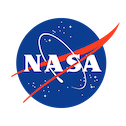


The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2021. California Institute of Technology. Government sponsorship acknowledged. 